In [1]:
# 출처:파이썬으로 배우는 딥러닝 교과서
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


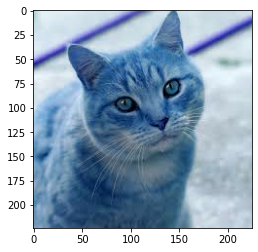

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv

src = '/content/drive/My Drive/test_colab/'
# 이미지 읽기
img = cv.imread(src+ 'sample.jpeg')
plt.imshow(img)

188/188 [==============================] - 0s 3ms/step - loss: 2.1227 - accuracy: 0.3960
evaluate loss: 1.9437100887298584
evaluate acc: 0.5350000262260437


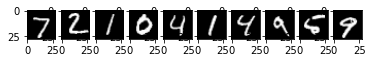

[7 2 1 0 4 1 3 9 4 9]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.layers import Activation, Dense
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

# 테스트 데이터의 첫 10장을 표시합니다
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show()

# X_test의 첫 10장의 예측된 라벨을 표시합시다
# ---------------------------
# 여기에 코드를 작성하세요
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)
# ---------------------------

In [6]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1
